<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Numerical Error and Instability
This section demonstrates different sources of numerical error and instability in numerical computations. Examples are implemented in Python using NumPy and standard math libraries.


In [12]:
# Example 1: Round-off Error in Repeated Addition
x = 1.0
for i in range(10):
    x += 1e-16
    print(f"Step {i+1}: {x}")


Step 1: 1.0
Step 2: 1.0
Step 3: 1.0
Step 4: 1.0
Step 5: 1.0
Step 6: 1.0
Step 7: 1.0
Step 8: 1.0
Step 9: 1.0
Step 10: 1.0


**Explanation**:  
This example illustrates the limitations of floating-point precision. Adding a very small number (`1e-16`) to `1.0` does not affect the result after a certain number of iterations due to round-off errors.


In [13]:
# Example 2: Catastrophic Cancellation
import math

a = 1.0000001
b = 1.0
direct = math.sqrt(a) - math.sqrt(b)
alt = (a - b) / (math.sqrt(a) + math.sqrt(b))

print(f"Direct computation: {direct}")
print(f"Alternative computation: {alt}")


Direct computation: 4.999999880794803e-08
Alternative computation: 4.999999877919342e-08


**Explanation**:  
Direct subtraction of close values (like `sqrt(a) - sqrt(b)`) can lead to significant loss of precision. An algebraic manipulation using the identity  
`(sqrt(a) - sqrt(b)) = (a - b)/(sqrt(a) + sqrt(b))`  
reduces this issue.


In [14]:
# Example 3: Matrix Condition Number and Solution Sensitivity
import numpy as np

A1 = np.array([[1, 2], [3, 4.0001]])
A2 = np.array([[1, 2], [3, 4]])
b = np.array([5, 11])

x1 = np.linalg.solve(A1, b)
x2 = np.linalg.solve(A2, b)

print("Solution with A1:", x1)
print("Solution with A2:", x2)


Solution with A1: [0.99979999 2.00010001]
Solution with A2: [1. 2.]


**Explanation**:  
Two matrices differ only slightly in the lower-right value, yet the solutions to the linear system differ noticeably. This highlights how small perturbations can affect results in ill-conditioned systems.


In [15]:
# Define the function and predictor-corrector solver
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return y - x**2 + 1

def predictor_corrector(f, x0, y0, h, n):
    x = [x0]
    y = [y0]

    for i in range(n):
        x_prev = x[-1]
        y_prev = y[-1]

        y_predict = y_prev + h * f(x_prev, y_prev)
        x_next = x_prev + h
        y_next = y_prev + (h / 2) * (f(x_prev, y_prev) + f(x_next, y_predict))

        x.append(x_next)
        y.append(y_next)

    return x, y


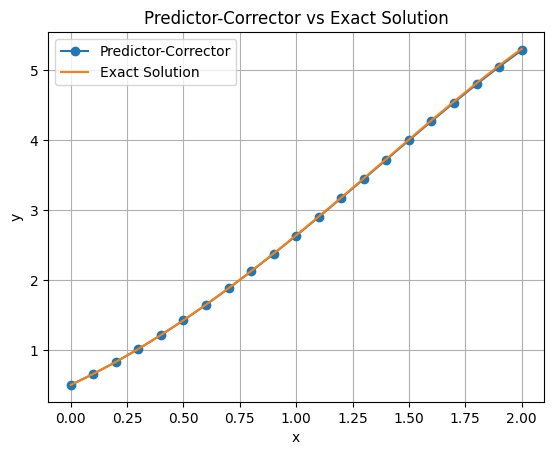

In [16]:
# Solve and plot
x_vals, y_vals = predictor_corrector(f, x0=0, y0=0.5, h=0.1, n=20)
x_exact = np.linspace(0, 2, 100)
y_exact = (x_exact + 1)**2 - 0.5 * np.exp(x_exact)

plt.plot(x_vals, y_vals, 'o-', label='Predictor-Corrector')
plt.plot(x_exact, y_exact, label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Predictor-Corrector vs Exact Solution")
plt.grid(True)
plt.show()


**Explanation**:  
This predictor-corrector implementation uses Euler’s method for prediction and trapezoidal rule for correction. The solution closely follows the exact analytical solution, demonstrating improved accuracy over basic Euler methods.


In [17]:
# Euler method for comparison
def euler_method(f, x0, y0, h, n):
    x = [x0]
    y = [y0]

    for i in range(n):
        x_next = x[-1] + h
        y_next = y[-1] + h * f(x[-1], y[-1])
        x.append(x_next)
        y.append(y_next)

    return x, y


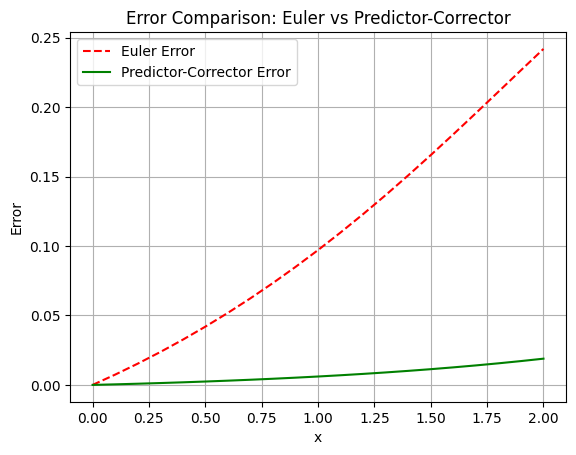

In [18]:
# Compare error between Euler and Predictor-Corrector
x_euler, y_euler = euler_method(f, 0, 0.5, 0.1, 20)
x_pc, y_pc = predictor_corrector(f, 0, 0.5, 0.1, 20)
y_exact = (np.array(x_euler) + 1)**2 - 0.5 * np.exp(np.array(x_euler))

euler_error = np.abs(np.array(y_euler) - y_exact)
pc_error = np.abs(np.array(y_pc) - y_exact)

plt.plot(x_euler, euler_error, 'r--', label='Euler Error')
plt.plot(x_pc, pc_error, 'g-', label='Predictor-Corrector Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.title("Error Comparison: Euler vs Predictor-Corrector")
plt.grid(True)
plt.show()


**Explanation**:  
This graph compares the numerical error of the basic Euler method versus the predictor-corrector method. The predictor-corrector method provides a more accurate approximation, especially over a longer range of `x`.
